Jose Miguel Londoño Lopera

# Taller 3 -Manejo de Archivos y BioPython
## Fundamentos en Biología Computacional
## 2019-1, Prof. Javier Correa

Nota: Se calificará que el código sea lo más simple, claro, original y eficiente. No usar funciones no realizadas por ustedes mismos.

Competencias: 1. Resuelve problemas de ciencias de los datos utilizando razonamiento lógico y programación en python. 2. Manipula archivos con formatos utilizados en bioinformática para extaeer información relevante. 3. Utiliza efectivamente módulos y paquetes de python especializados para biología.

Tener en cuenta: a. desarrollar y aplicar funciones en python, b. manipular archivos (entrada y salida), c. utilizar librerias especializadas (Biopython).<br>
Ejercicio:<br>

1. Un investigador desea desarrollar un Script en python, que le permita encontrar el grupo monifilético en común entre una lista de especies de plantas (archivo adjunto: lista_mercado.tsv). La información sobre la taxonomía de cada una de las especies fue descargada de la base de datos del GenBank, luego concatenada y se encuentra en formato .gb anexo <br> 

In [1]:
%%bash
cat lista_mercado.tsv

Couldn't find program: 'bash'


In [2]:
%%bash
head -20 Mercado.gb

Couldn't find program: 'bash'


#### $\rightarrow$ Con el archivo "Mercado.gb";<br>
- A. Desarrolle un script con el cual pueda extrer la información relacionada con la taxonomía de cada especie.<br>
- B. Organice esta información en una objeto tipo lista o diccionario.<br>
- C. Cree una función que reciba el objeto anterior y compare las clasificaciones entre las diferentes especies para retornar el ancestro monofilético común más reciente a todas ellas. <br> Ejemplo: Embryophyta

A

In [3]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
a = SeqIO.parse("Mercado.gb","genbank")
b = []
for c in a:
    b.append(c)
for i in range(0,len(b)):
    print (b[i].id, b[i].annotations["organism"], b[i].annotations["taxonomy"])

MG859922.1 Pisum sativum subsp. elatius ['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'eudicotyledons', 'Gunneridae', 'Pentapetalae', 'rosids', 'fabids', 'Fabales', 'Fabaceae', 'Papilionoideae', 'Fabeae', 'Pisum']
MH283711.1 Solanum melongena var. insanum ['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'eudicotyledons', 'Gunneridae', 'Pentapetalae', 'asterids', 'lamiids', 'Solanales', 'Solanaceae', 'Solanoideae', 'Solaneae', 'Solanum']
KX028884.1 Cocos nucifera ['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Arecaceae', 'Arecoideae', 'Cocoseae', 'Attaleinae', 'Cocos']
HQ336405.1 Prunus persica ['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'eudicotyledons', 'Gunneridae', 'Pentapetalae', 'rosids', 'fabids', 'Rosales',

B

In [4]:
w=[]
for i in range(0,len(b)):
    d = b[i].annotations["taxonomy"]
    w.append(d)
print (w[0])

['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'eudicotyledons', 'Gunneridae', 'Pentapetalae', 'rosids', 'fabids', 'Fabales', 'Fabaceae', 'Papilionoideae', 'Fabeae', 'Pisum']


C

In [5]:
e=0
x=len(d)
for i in range(0,x):
    y=len(d[i])
    for j in range(0,y):
        try:
            if d[i][j]==d[i+1][j]:
                e=j    
        except:
            continue
print (d[e])

Magnoliophyta


2 . El mismo investigador está ahora interesado en hacer una caracterización funcional de los genomas de los cloroplastos que poseen estas especies. Para esto y continuando con el archivo del punto anterior (Mercado.gb), resuelva las siguientes preguntas:

- A. Una forma de diferenciar una especie de otra es a través de la estimación del contenido de Guaninas y Citosinas en los genomas. Utilizando funciones de biopython responder; ¿Cuales son los valores de %GC para cada especie? retorne un diccionario con las especies como llave y su respectivo valor de %GC. Consulte el diccionario y muestre ¿Qué especie presenta el mayor %GC? ¿Y cual el más bajo? Represente los resultados en un dendograma donde se relacione las proximidades en los contenidos de %GC (puede usar Ploty, numpy, etc).

- B. Otra forma de caracterizar los genomas es estimando la frecuencia con las que aparecen los codones en los genes codificantes. Usando biopython hacer una función que me extraiga los genes codificantes para cada genoma del cloroplasto del archivo .gb, definir una función que me permita estimar la frecuencia de cada uno de los codones usados por la célula. Con las herramientas anteriores y usando funciones accesorias grafique la frecuencia de estos codones versus el codón encontrado para cada una de las especies. Finalmente, responda: ¿Qué especie presenta el codón más inusual? ¿Qué aminoácido es el mas prevalente y menos prevalente?



A

In [6]:
f={}
from Bio.SeqUtils import GC
g=[GC(rec.seq) for rec in SeqIO.parse("Mercado.gb","genbank")]
for i in range(0,len(b)):
    f[b[i].annotations["organism"]] = (g[i])
print (f)

{'Pisum sativum subsp. elatius': 34.83117563298908, 'Solanum melongena var. insanum': 37.710355466992354, 'Cocos nucifera': 37.4382835724441, 'Prunus persica': 36.759617212751124, 'Cicer arietinum': 33.90627119590804, 'Lactuca sativa': 37.54942005079465, 'Lens culinaris': 34.42549627135735, 'Olea europaea subsp. laperrinei': 37.81224741156999, 'Solanum tuberosum': 37.87344184609045, 'Ananas comosus': 37.37314891377885, 'Chenopodium quinoa': 37.243747064543655, 'Brassica oleracea var. capitata': 36.36138387908663, 'Solanum lycopersicum': 37.86184803026014, 'Manihot esculenta': 35.87297851387091}


In [7]:
M=''
h=0
for i in range (0,len(b)):
    if f[b[i].annotations["organism"]] > h:
        h = f[b[i].annotations["organism"]]
        M = b[i].annotations["organism"]
print (M)

Solanum tuberosum


In [8]:
m=''
for i in range (0,len(b)):
    if f[b[i].annotations["organism"]] < h:
        h = f[b[i].annotations["organism"]]
        m = b[i].annotations["organism"]
print (m)

Cicer arietinum


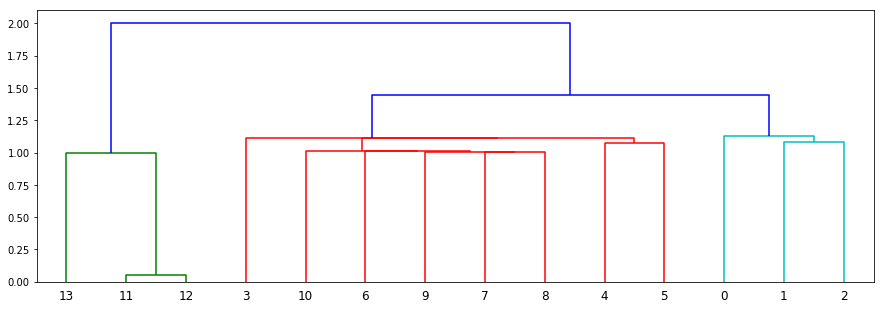

In [79]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
s = np.array([[0,33.90627119590804],[1,34.42549627135735],[2,34.83117563298908],[3,35.87297851387091],[4,36.36138387908663],[5,36.759617212751124],[6,37.243747064543655],[7,37.37314891377885],[8,37.4382835724441],[9,37.54942005079465],[10,37.71035546699235],[12,37.81224741156999],[12,37.86184803026014],[13,37.87344184609045],])
S = linkage(s, 'single')
plt.figure(figsize=(15, 5))  
dendrogram(S)
plt.show()

B